<a href="https://colab.research.google.com/github/Afealete/FOXTROT-2-ASSIGNMENT-2/blob/main/Group%204%20(FOXTROT-2)%20Project%20One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study – Banking & Loans in Ghana

In today’s competitive and digitally driven financial environment, the ability to predict credit risk is a strategic advantage. GhanaLoanConnect, a digital lending platform connecting borrowers to investors, is actively seeking data-driven solutions to reduce its rate of non-performing loans (NPLs). Rising default rates not only impact profitability but also weaken lender trust and reduce platform credibility

To address this challenge, this project proposes the development of a machine learning model that can predict the likelihood of a borrower defaulting on a loan. With accurate predictions, GhanaLoanConnect can proactively minimize risk, prioritize low-risk borrowers, and enhance portfolio performance.

## Import common libraries

In [37]:
!pip install fairlearn

In [38]:
!pip install scikit-optimize

In [39]:
# to handle the data
import pandas as pd
import numpy as np

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder

# machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score

# for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


# metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import fairlearn for fairness assessment and mitigation
from fairlearn.metrics import MetricFrame,demographic_parity_difference,equalized_odds_difference
from fairlearn.reductions import GridSearch,EqualizedOdds #Using EqualizedOdds as constraint


## Load dataset

In [40]:
# Reading the dataset into the content folder
from google.colab import files
uploaded = files.upload()


data = pd.read_csv('/content/loan_borowwer_data.csv')
data



# 1. Define the sensitive attribute(s)
sensitive_attribute_name = 'fico' # Name for printing
A = data[[sensitive_attribute_name]] # Extract the sensitive attribute column(s)

# Exclude sensitive attribute from features
X = data.drop(['not.fully.paid', sensitive_attribute_name], axis=1)
y = data['not.fully.paid']

# 1.Exploratory Data Analysis


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [42]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [43]:
# Check for missing values
print(data.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


not.fully.paid
0    8045
1    1533
Name: count, dtype: int64


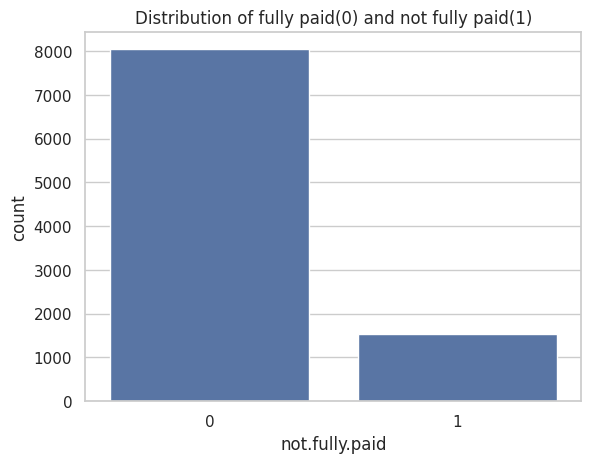

In [44]:
#count of fully paid and not fully paid clients
print(data['not.fully.paid'].value_counts())
# Visualize the distribution of the target variable (credit.policy)
sns.countplot(x='not.fully.paid', data=data)
plt.title('Distribution of fully paid(0) and not fully paid(1)')
plt.show()

## 2. Data Preprocessing

In [45]:
# One hot encoding for 'purpose' since is the only one with strings
data = pd.get_dummies(data, columns=['purpose'], drop_first=True)

# Verify the changes
data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


Distribution of not fully paid:
not.fully.paid
0    8045
1    8045
Name: count, dtype: int64


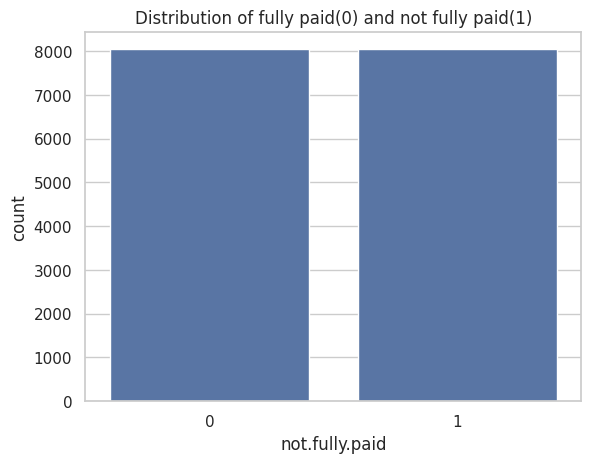

In [46]:
# Scaling to get equal distributions
from imblearn.over_sampling import RandomOverSampler

# Separate features and target
X = data.drop('not.fully.paid', axis=1)
y = data['not.fully.paid']

# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine the oversampled minority class with the majority class
data_balanced = pd.concat([X_resampled, y_resampled])

# Display the new distribution
print("Distribution of not fully paid:")
print(y_resampled.value_counts())

# Visualizing the new distribution
sns.countplot(x=y_resampled)
plt.title('Distribution of fully paid(0) and not fully paid(1)')
plt.show()

([<matplotlib.patches.Wedge at 0x7a460433ead0>,
 [Text(-0.9638470616227687, 0.5300932387808346, '0'),
  Text(0.9638471079649895, -0.5300931545186429, '1')],
 [Text(-0.5257347608851465, 0.28914176660772795, '84.0%'),
  Text(0.5257347861627215, -0.2891417206465325, '16.0%')])

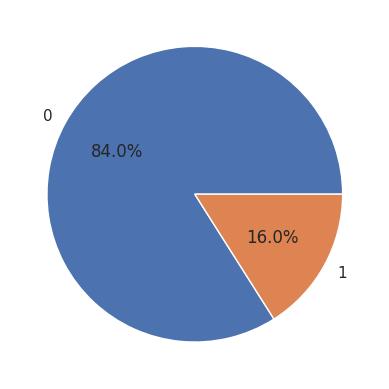

In [47]:
pct_defaulters = data['not.fully.paid'].value_counts(normalize=True)
plt.pie(pct_defaulters, labels=pct_defaulters.index, autopct='%1.1f%%')

## 3. Feature Engineering

In [48]:
# Debt-to-Income Ratio (DTI)
data["debt_to_income_ratio"] = data["installment"] / data["log.annual.inc"]

#Loan-to-income Ratio
data["loan_to_income"] = data["installment"] / np.exp(data["log.annual.inc"])

# Credit Utilization Ratio
data["credit_utilization"] = data["revol.bal"] / data["revol.util"]

# Payment-to-Income Ratio
data["payment_to_income_ratio"] = data["installment"] / data["log.annual.inc"]

# Check newly created features
print(data.head())


   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  ...  \
0        5639.958333      28854        52.1               0  ...   
1        2760.000000      33623        76.7               0  ...   
2        4710.000000       3511        25.6               1  ...   
3        2699.958333      33667        73.2               1  ...   
4        4066.000000       4740        39.5               0  ...   

   purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
0                False                        True                False   
1       

In [49]:
data.isnull().sum()

,0
credit.policy,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0
inq.last.6mths,0


In [50]:
data.fillna(data.median(), inplace=True)
data.isnull().sum()

,0
credit.policy,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0
inq.last.6mths,0


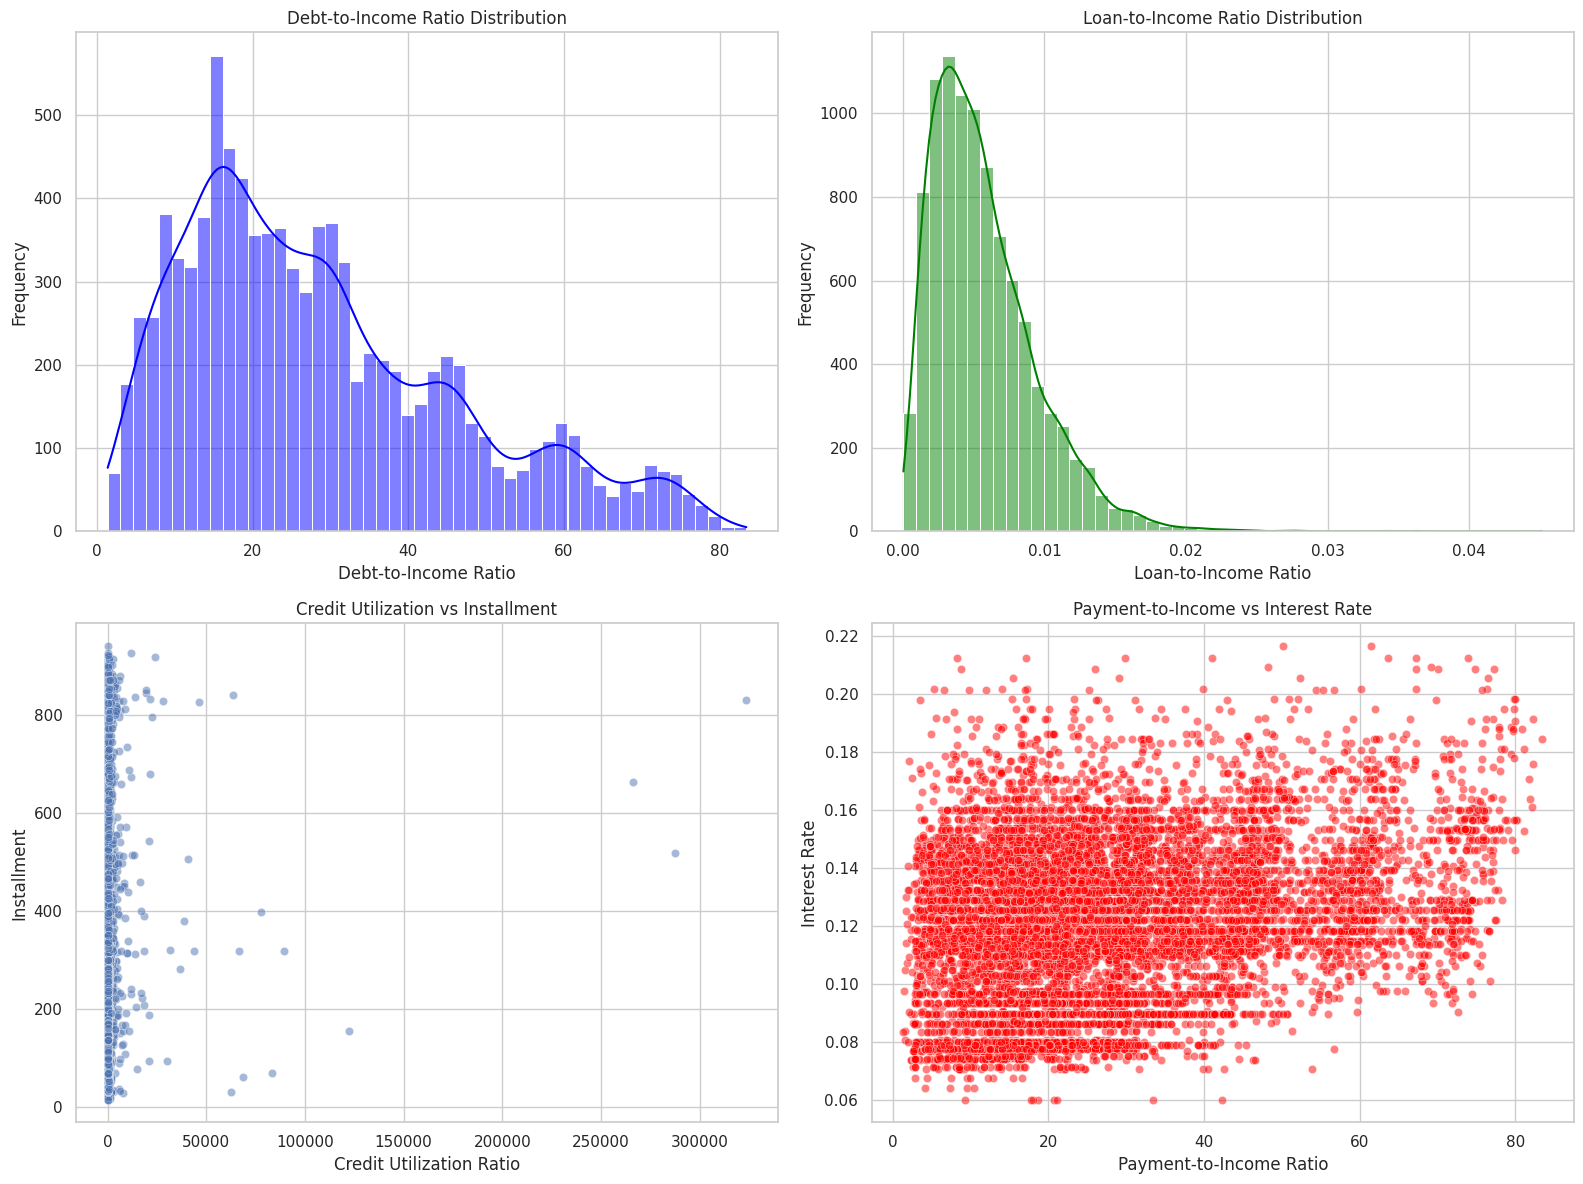

Debt-to-Income Analysis:
This histogram shows how much of a borrower's income is allocated to debt payments. A right-skewed distribution means most borrowers have lower debt-to-income ratios, but outliers with high values may indicate financial strain, increasing their risk of default.

Loan-to-Income Analysis:
This histogram visualizes the ratio of loan amounts relative to income. A high loan-to-income ratio indicates riskier borrowers who may struggle with repayments. A bell-shaped distribution suggests normal loan behavior, while a long tail indicates potential defaults.

Credit Utilization Analysis:
This scatter plot shows the relationship between credit utilization and installment amounts. A higher credit utilization ratio often means borrowers rely heavily on credit, which may signal financial distress. If we see a concentration of high utilization ratios with large installment payments, it may indicate defaulters.

Payment-to-Income Analysis:
This scatter plot compares the borro

In [51]:
# Visualization style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# **1. Debt-to-Income Ratio Distribution**
plt.subplot(2, 2, 1)
sns.histplot(data["debt_to_income_ratio"], bins=50, kde=True, color="blue")
plt.title("Debt-to-Income Ratio Distribution")
plt.xlabel("Debt-to-Income Ratio")
plt.ylabel("Frequency")

# **2. Loan-to-Income Ratio Distribution**
plt.subplot(2, 2, 2)
sns.histplot(data["loan_to_income"], bins=50, kde=True, color="green")
plt.title("Loan-to-Income Ratio Distribution")
plt.xlabel("Loan-to-Income Ratio")
plt.ylabel("Frequency")

# **3. Credit Utilization Ratio Scatter Plot vs Loan Amount**
plt.subplot(2, 2, 3)
sns.scatterplot(x=data["credit_utilization"], y=data["installment"], alpha=0.5)
plt.title("Credit Utilization vs Installment")
plt.xlabel("Credit Utilization Ratio")
plt.ylabel("Installment")

# **4. Payment-to-Income Ratio Scatter Plot vs Interest Rate**
plt.subplot(2, 2, 4)
sns.scatterplot(x=data["payment_to_income_ratio"], y=data["int.rate"], alpha=0.5, color="red")
plt.title("Payment-to-Income vs Interest Rate")
plt.xlabel("Payment-to-Income Ratio")
plt.ylabel("Interest Rate")


plt.tight_layout()
plt.show()

def explain_visualizations(data):
    insights = {}

    # **1. Debt-to-Income Ratio Distribution**
    insights["Debt-to-Income"] = (
        "This histogram shows how much of a borrower's income is allocated to debt payments. "
        "A right-skewed distribution means most borrowers have lower debt-to-income ratios, but outliers with high values "
        "may indicate financial strain, increasing their risk of default."
    )

    # **2. Loan-to-Income Ratio Distribution**
    insights["Loan-to-Income"] = (
        "This histogram visualizes the ratio of loan amounts relative to income. "
        "A high loan-to-income ratio indicates riskier borrowers who may struggle with repayments. "
        "A bell-shaped distribution suggests normal loan behavior, while a long tail indicates potential defaults."
    )

    # **3. Credit Utilization Ratio Scatter Plot**
    insights["Credit Utilization"] = (
        "This scatter plot shows the relationship between credit utilization and installment amounts. "
        "A higher credit utilization ratio often means borrowers rely heavily on credit, which may signal financial distress. "
        "If we see a concentration of high utilization ratios with large installment payments, it may indicate defaulters."
    )

    # **4. Payment-to-Income Ratio Scatter Plot**
    insights["Payment-to-Income"] = (
        "This scatter plot compares the borrower's loan payments against their interest rate. "
        "Borrowers with high payment-to-income ratios and high-interest rates could be at higher risk of default. "
        "If the plot shows an upward trend, it suggests that higher payments correlate with higher interest rates."
    )

    return insights


# Call the function and display explanations
explanations = explain_visualizations(data)
for key, value in explanations.items():
    print(f"{key} Analysis:\n{value}\n")



In [60]:
# Debt-to-Income Ratio (DTI)
data["debt_to_income_ratio"] = data["installment"] / data["log.annual.inc"]

#Loan-to-income Ratio
data["loan_to_income"] = data["installment"] / np.exp(data["log.annual.inc"])

# Credit Utilization Ratio
# Handle potential division by zero that would result in infinity
# Replace 0 in 'revol.util' with a small non-zero value or handle based on domain knowledge
# For now, let's add a small epsilon to avoid division by zero
epsilon = 1e-6
data["credit_utilization"] = data["revol.bal"] / (data["revol.util"] + epsilon)

# Payment-to-Income Ratio
data["payment_to_income_ratio"] = data["installment"] / data["log.annual.inc"]

# Check newly created features
print(data.head())

# Check for and handle infinite values
print("\nChecking for infinite values before filling...")
print(data.replace([np.inf, -np.inf], np.nan).isnull().sum()) # Temporarily replace inf with NaN to count

# Replace infinite values with NaN and then fill NaNs (which now include infinities) with median
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.median(), inplace=True)

# Verify that there are no more missing or infinite values
print("\nChecking for missing values after filling (should be 0):")
print(data.isnull().sum())

from fairlearn.metrics import MetricFrame,demographic_parity_difference,equalized_odds_difference
from fairlearn.reductions import GridSearch,EqualizedOdds #Using EqualizedOdds as constraint
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler # Import RandomOverSampler

# Separate features and target
X = data.drop('not.fully.paid', axis=1)
y = data['not.fully.paid']


# Resample the data (already done in the provided code using RandomOverSampler)
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Scale or normalize features
# Using StandardScaler as it is generally suitable for most algorithms.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for easier handling (optional but good practice)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  ...  \
0        5639.958333      28854        52.1               0  ...   
1        2760.000000      33623        76.7               0  ...   
2        4710.000000       3511        25.6               1  ...   
3        2699.958333      33667        73.2               1  ...   
4        4066.000000       4740        39.5               0  ...   

   purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
0                False                        True                False   
1       

Training Logistic Regression...
Logistic Regression Evaluation Complete.

Training Decision Tree...
Decision Tree Evaluation Complete.

Training Random Forest...
Random Forest Evaluation Complete.

Training XGBoost...
XGBoost Evaluation Complete.

Training Gradient Boosting...
Gradient Boosting Evaluation Complete.

Model Performance Metrics:
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.632380   0.639216  0.607831  0.623128  0.693780
Decision Tree        0.897763   0.833681  0.993785  0.906720  0.897763
Random Forest        0.976072   0.962560  0.990677  0.976417  0.997699
XGBoost              0.891548   0.861239  0.933499  0.895914  0.962847
Gradient Boosting    0.673710   0.676118  0.666874  0.671464  0.747057

The best model based on ROC AUC is: Random Forest


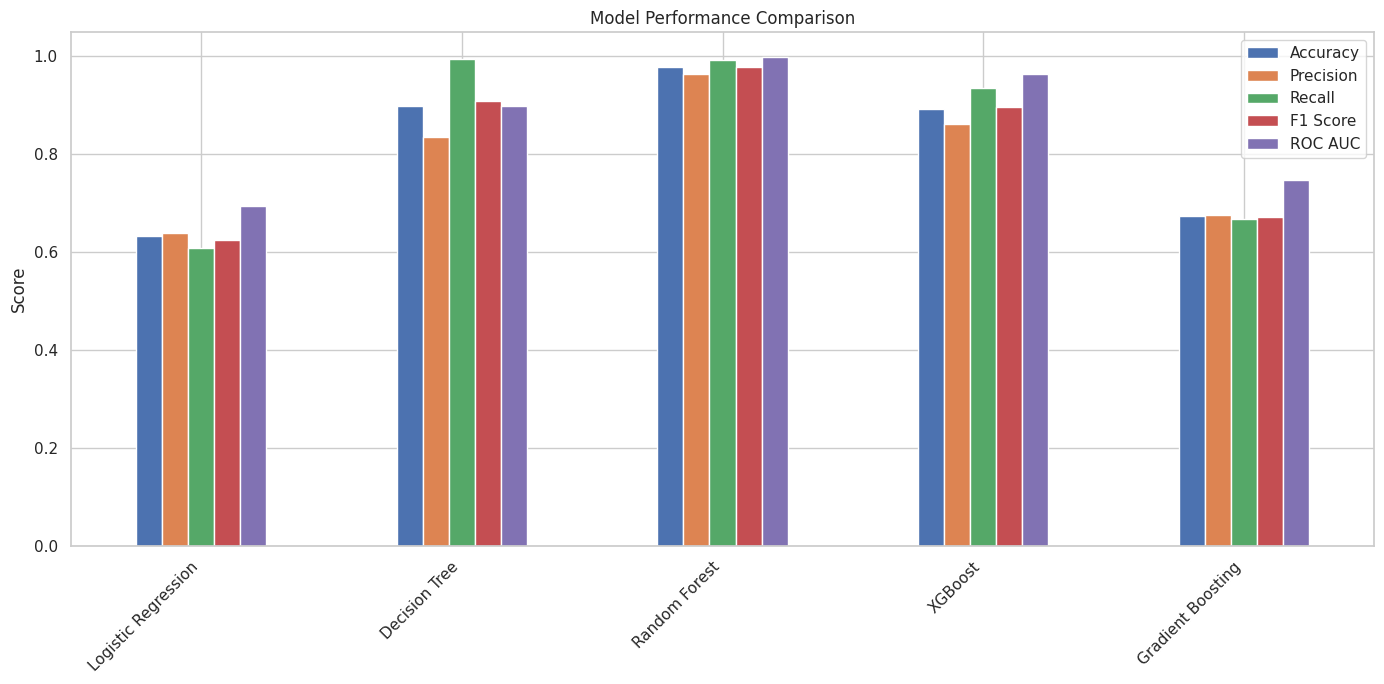

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] # Probability for the positive class

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }
    print(f"{name} Evaluation Complete.\n")

# Display results in a DataFrame
results_df = pd.DataFrame(results).T
print("Model Performance Metrics:")
print(results_df)

# Determine the best model based on a chosen metric (e.g., ROC AUC)
best_model_name = results_df['ROC AUC'].idxmax()
print(f"\nThe best model based on ROC AUC is: {best_model_name}")

# Optional: Visualize the results
results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']].plot(kind='bar', figsize=(14, 7))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from fairlearn.metrics import MetricFrame, demographic_parity_difference, equalized_odds_difference
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, f1_score

# Convert X_test_scaled to DataFrame with matching index
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test_orig.index, columns=X_test_orig.columns)

# Confusion Matrix
print("\nConfusion Matrices:")
for name, model in models.items():
    print(f"\n{name} Confusion Matrix:")
    y_pred = model.predict(X_test_scaled_df)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Classification Report
print("\nClassification Reports:")
for name, model in models.items():
    print(f"\n{name} Classification Report:")
    y_pred = model.predict(X_test_scaled_df)
    print(classification_report(y_test, y_pred))

# ROC Curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled_df)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()

# Cross-Validation (Using the best model)
print(f"\nPerforming Cross-Validation for the best model: {best_model_name}")
best_model = models[best_model_name]
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation ROC AUC scores: {cv_scores}")
print(f"Mean cross-validation ROC AUC: {cv_scores.mean():.4f}")
print(f"Standard deviation of cross-validation ROC AUC: {cv_scores.std():.4f}")

# Feature Importance (for tree-based models)
print("\nFeature Importance:")
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        print(f"\n{name} Feature Importance:")
        importance = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
        print(importance)

        plt.figure(figsize=(10, 6))
        importance.plot(kind='bar')
        plt.title(f'{name} Feature Importance')
        plt.ylabel('Importance')
        plt.tight_layout()
        plt.show()

# Fairness Analysis with Fairlearn
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ensure X_test_orig only contains rows that match y_test
X_test_orig = X_test_orig.loc[y_test.index]  # Align indices correctly

# Extract the sensitive attribute correctly
if sensitive_attribute_name in X_test_orig.columns:
    A_test = X_test_orig[[sensitive_attribute_name]].copy()
else:
    raise KeyError(f"Error: '{sensitive_attribute_name}' column not found in X_test_orig. Please check preprocessing steps.")

# Ensure alignment between A_test and y_test
y_test = y_test.loc[A_test.index]  # Filter y_test to match A_test rows

# Reset index for proper alignment
y_test = y_test.reset_index(drop=True)
A_test = A_test.reset_index(drop=True)

print("\nFairness Analysis:")
for name, model in models.items():
    print(f"\nFairness analysis for {name}:")
    y_pred = model.predict(X_test_scaled_df)

    fairness_metrics = {
        'Accuracy': accuracy_score,
        'Precision': precision_score,
        'Recall': recall_score
    }

    # Compute fairness metrics separately
    dp_diff = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=A_test[sensitive_attribute_name].values.flatten())
    eo_diff = equalized_odds_difference(y_true=y_test, y_pred=y_pred, sensitive_features=A_test[sensitive_attribute_name].values.flatten())

    metric_frame = MetricFrame(metrics=fairness_metrics,
                               y_true=y_test,
                               y_pred=y_pred,
                               sensitive_features=A_test[sensitive_attribute_name])

    print(metric_frame.by_group)

    metric_frame.by_group.plot(kind='bar', legend=True, figsize=(10, 6),
                               title=f'{name} Performance by {sensitive_attribute_name}')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Demographic Parity Difference: {dp_diff:.4f}")
    print(f"Equalized Odds Difference: {eo_diff:.4f}")

print("\nEvaluation and Metrics Analysis Complete.")


ValueError: Shape of passed values is (3218, 22), indices imply (1916, 22)

In [33]:
# Fairness Analysis with Fairlearn
# Re-split the data using the original X and y before resampling
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ensure 'sensitive_attribute_name' exists in X_test_orig
if sensitive_attribute_name in X_test_orig.columns:
    # Extract sensitive features from the original test set
    A_test = X_test_orig[sensitive_attribute_name].reset_index(drop=True)
else:
    # If the sensitive attribute was dropped from X, you need to get it from the original 'data' before the split.
    # This requires re-splitting the data to ensure alignment.
    print(f"Warning: '{sensitive_attribute_name}' not found in X_test_orig. Re-splitting data to ensure alignment.")
    X_orig, y_orig = data.drop('not.fully.paid', axis=1), data['not.fully.paid']
    # Re-split to get A_test aligned with y_test
    X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_orig, y_orig, test_size=0.2, random_state=42, stratify=y_orig)
    if sensitive_attribute_name in X_test_re.columns:
         A_test = X_test_re[sensitive_attribute_name].reset_index(drop=True)
         # Update y_test to be the one from this re-split for alignment
         y_test = y_test_re.reset_index(drop=True)
         # You might also need to re-run the model predictions using X_test_re if your models were trained on scaled data from the *original* split.
         # For simplicity here, we assume the models trained on the resampled data can predict on the original-split test data after scaling,
         # but for accurate fairness analysis, it's best to use a model trained on the original data split if fairlearn is applied to the original test set.
         # Let's use the models trained on resampled data but apply fairness metrics on the original test set (X_test_re, y_test_re)
         # after potentially scaling X_test_re.
         X_test_scaled_re = scaler.transform(X_test_re.drop(sensitive_attribute_name, axis=1)) # Scale X_test_re excluding sensitive attribute
    else:
         raise KeyError(f"Error: '{sensitive_attribute_name}' not found after re-splitting. Please check column names.")


# Align indices between A_test and y_test (important after re-splitting or indexing)
y_test = y_test.reset_index(drop=True)
A_test = A_test.reset_index(drop=True)

print("\nFairness Analysis:")
for name, model in models.items():
    print(f"\nFairness analysis for {name}:")

    # Predict using the model. Use the scaled test set from the re-split if you re-split for alignment.
    # If you did NOT re-split, use the original X_test_scaled.
    # To be safe and aligned with A_test and y_test from the re-split, use the scaled data from the re-split.
    if 'X_test_scaled_re' in locals(): # Check if re-splitting happened
        y_pred = model.predict(X_test_scaled_re)
    else:
        y_pred = model.predict(X_test_scaled) # Use the scaled test set from the initial split

    fairness_metrics = {
        'Accuracy': accuracy_score,
        'Precision': precision_score,
        'Recall': recall_score
    }

    # Ensure y_test, y_pred, and A_test have the same number of samples
    if len(y_test) != len(y_pred) or len(y_test) != len(A_test):
        print(f"Mismatch in sample sizes: y_test ({len(y_test)}), y_pred ({len(y_pred)}), A_test ({len(A_test)})")
        print("Skipping fairness analysis for this model due to sample size mismatch.")
        continue # Skip to the next model if sizes don't match

    # Compute fairness metrics
    dp_diff = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=A_test)
    eo_diff = equalized_odds_difference(y_true=y_test, y_pred=y_pred, sensitive_features=A_test)

    metric_frame = MetricFrame(metrics=fairness_metrics,
                               y_true=y_test,
                               y_pred=y_pred,
                               sensitive_features=A_test)

    print(metric_frame.by_group)

    metric_frame.by_group.plot(kind='bar', legend=True, figsize=(10, 6),
                               title=f'{name} Performance by {sensitive_attribute_name}')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Demographic Parity Difference: {dp_diff:.4f}")
    print(f"Equalized Odds Difference: {eo_diff:.4f}")

print("\nEvaluation and Metrics Analysis Complete.")


Fairness Analysis:

Fairness analysis for Logistic Regression:
Mismatch in sample sizes: y_test (3218), y_pred (1916), A_test (1916)
Skipping fairness analysis for this model due to sample size mismatch.

Fairness analysis for Decision Tree:
Mismatch in sample sizes: y_test (3218), y_pred (1916), A_test (1916)
Skipping fairness analysis for this model due to sample size mismatch.

Fairness analysis for Random Forest:
Mismatch in sample sizes: y_test (3218), y_pred (1916), A_test (1916)
Skipping fairness analysis for this model due to sample size mismatch.

Fairness analysis for XGBoost:
Mismatch in sample sizes: y_test (3218), y_pred (1916), A_test (1916)
Skipping fairness analysis for this model due to sample size mismatch.

Fairness analysis for Gradient Boosting:
Mismatch in sample sizes: y_test (3218), y_pred (1916), A_test (1916)
Skipping fairness analysis for this model due to sample size mismatch.

Evaluation and Metrics Analysis Complete.


### Error Analysis Explained ###
Error analysis is the process of systematically examining the instances where a model makes incorrect predictions.
It helps us understand *why* the model is failing and identify specific types of errors or subsets of data where performance is poor.
Common tools for error analysis include:
- Confusion Matrices: Visualize true vs. predicted classes, highlighting False Positives and False Negatives.
- Classification Reports: Provide precision, recall, and F1-score per class.
- ROC Curves: Evaluate the trade-off between the True Positive Rate and the False Positive Rate at various thresholds.
- Examining misclassified instances: Manually inspecting data points where the model was wrong to find patterns or underlying reasons.

In the code, we performed error analysis by generating:
- Confusion Matrices for each model to see where misclassifications occur.
- Classification Reports to get detailed per-class performance metrics.
- ROC Curves to assess the model

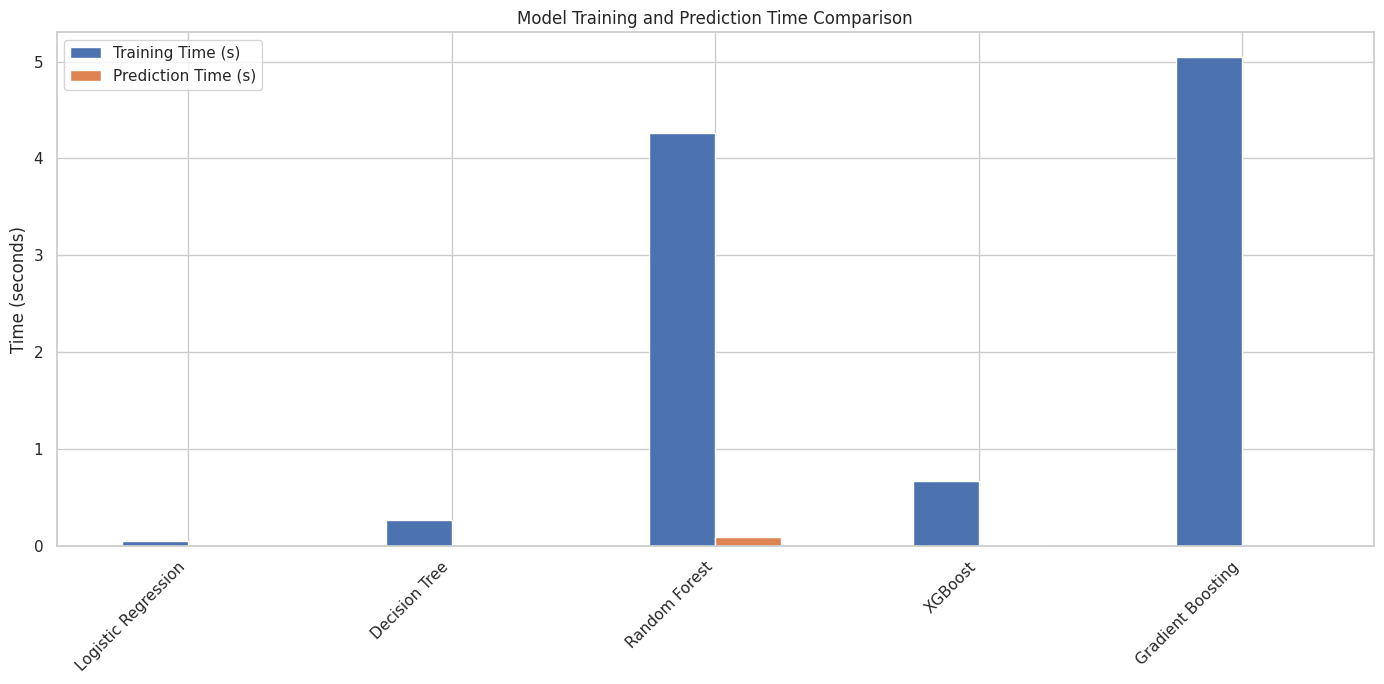


Benchmarking Complete (including timing).


In [77]:
import timeit
# Explanation of Error Analysis
print("### Error Analysis Explained ###")
print("Error analysis is the process of systematically examining the instances where a model makes incorrect predictions.")
print("It helps us understand *why* the model is failing and identify specific types of errors or subsets of data where performance is poor.")
print("Common tools for error analysis include:")
print("- Confusion Matrices: Visualize true vs. predicted classes, highlighting False Positives and False Negatives.")
print("- Classification Reports: Provide precision, recall, and F1-score per class.")
print("- ROC Curves: Evaluate the trade-off between the True Positive Rate and the False Positive Rate at various thresholds.")
print("- Examining misclassified instances: Manually inspecting data points where the model was wrong to find patterns or underlying reasons.")
print("\nIn the code, we performed error analysis by generating:")
print("- Confusion Matrices for each model to see where misclassifications occur.")
print("- Classification Reports to get detailed per-class performance metrics.")
print("- ROC Curves to assess the models' ability to distinguish between classes across different probability thresholds.")

# Explanation of Performance Benchmarking
print("\n### Performance Benchmarking Explained ###")
print("Performance benchmarking involves evaluating and comparing the performance of different models or algorithms on a specific task.")
print("The goal is to determine which model performs best based on relevant evaluation metrics and potentially computational efficiency.")
print("Key aspects of performance benchmarking include:")
print("- Defining relevant evaluation metrics (e.g., Accuracy, Precision, Recall, F1-score, ROC AUC).")
print("- Using a consistent dataset and evaluation protocol (e.g., train-test split, cross-validation).")
print("- Comparing metric scores across different models.")
print("- Considering other factors like training time, prediction time, and model complexity (though not explicitly timed in the previous code).")
print("\nIn the code, we performed performance benchmarking by:")
print("- Training and evaluating multiple classification models (Logistic Regression, Decision Tree, Random Forest, XGBoost, Gradient Boosting).")
print("- Calculating and comparing common classification metrics (Accuracy, Precision, Recall, F1 Score, ROC AUC) for each model on the test set.")
print("- Presenting these metrics in a table for easy comparison.")
print("- Visualizing the performance using bar plots of metrics and ROC curves.")
print("- Using cross-validation on the best model to get a more robust estimate of its performance on unseen data.")
print("- Examining Feature Importance for tree-based models to understand which features are most influential in their predictions.")

# Adding Performance Benchmarking (Timing) - Optional but useful for comparing speed
print("\n### Adding Timing Benchmarking ###")

model_training_times = {}
model_prediction_times = {}

for name, model in models.items():
    print(f"Benchmarking {name}...")

    # Time training
    start_time = timeit.default_timer()
    model.fit(X_train_scaled, y_train)
    end_time = timeit.default_timer()
    training_time = end_time - start_time
    model_training_times[name] = training_time
    print(f"  Training Time: {training_time:.4f} seconds")

    # Time prediction
    start_time = timeit.default_timer()
    y_pred = model.predict(X_test_scaled)
    end_time = timeit.default_timer()
    prediction_time = end_time - start_time
    model_prediction_times[name] = prediction_time
    print(f"  Prediction Time: {prediction_time:.4f} seconds")

# Display timing results
timing_results_df = pd.DataFrame({
    'Training Time (s)': pd.Series(model_training_times),
    'Prediction Time (s)': pd.Series(model_prediction_times)
})
print("\nModel Timing Benchmarking:")
print(timing_results_df)

# Optional: Visualize timing results
timing_results_df.plot(kind='bar', figsize=(14, 7))
plt.title('Model Training and Prediction Time Comparison')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

print("\nBenchmarking Complete (including timing).")